Importing the Dependencies

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
# from sklearn import metrics

Data Collection and Processing

In [141]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('car data.csv')

In [142]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [143]:
car_dataset['Owner'].unique()

array([0, 1, 3])

In [144]:
# checking the number of rows and columns
car_dataset.shape

(301, 9)

In [145]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [146]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [147]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding the Categorical Data

In [148]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

C:\Users\rajki\AppData\Local\Temp\ipykernel_39464\336345893.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
C:\Users\rajki\AppData\Local\Temp\ipykernel_39464\336345893.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
C:\Users\rajki\AppData\Local\Temp\ipykernel_39464\336345893.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a 

In [149]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data and Target

In [150]:
X = car_dataset.drop(['Car_Name','Kms_Driven'],axis=1)
Y = car_dataset['Kms_Driven']

In [151]:
print(X)

     Year  Selling_Price  Present_Price  Fuel_Type  Seller_Type  Transmission  \
0    2014           3.35           5.59          0            0             0   
1    2013           4.75           9.54          1            0             0   
2    2017           7.25           9.85          0            0             0   
3    2011           2.85           4.15          0            0             0   
4    2014           4.60           6.87          1            0             0   
..    ...            ...            ...        ...          ...           ...   
296  2016           9.50          11.60          1            0             0   
297  2015           4.00           5.90          0            0             0   
298  2009           3.35          11.00          0            0             0   
299  2017          11.50          12.50          1            0             0   
300  2016           5.30           5.90          0            0             0   

     Owner  
0        0  
1

In [152]:
print(Y)

0      27000
1      43000
2       6900
3       5200
4      42450
       ...  
296    33988
297    60000
298    87934
299     9000
300     5464
Name: Kms_Driven, Length: 301, dtype: int64


Splitting Training and Test data

In [153]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [154]:
X_train.head()

,Year,Selling_Price,Present_Price,Fuel_Type,Seller_Type,Transmission,Owner
204,2015,2.75,4.430,0,0,0,0
249,2016,5.25,7.600,0,0,0,0
277,2015,9.70,13.600,0,0,0,0
194,2008,0.20,0.787,0,1,0,0
244,2013,5.95,9.400,1,0,0,0


Model Training

1. Linear Regression

In [155]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [156]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [157]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [158]:
# R squared Error
# error_score = metrics.r2_score(Y_train, training_data_prediction)
# print("R squared Error : ", error_score)

Visualize the actual prices and Predicted prices

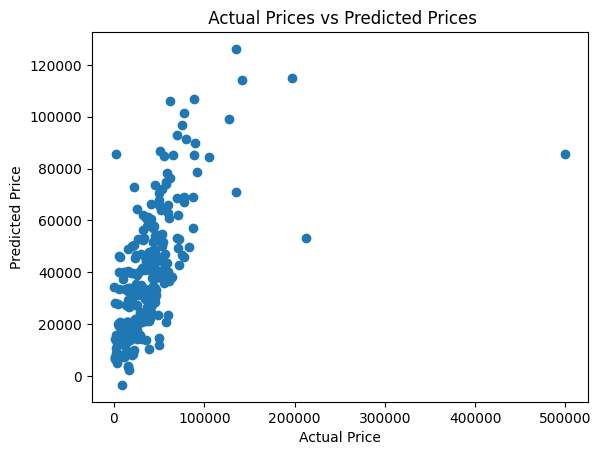

In [159]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [160]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [161]:
# R squared Error
# error_score = metrics.r2_score(Y_test, test_data_prediction)
# print("Accuracy : ", error_score)

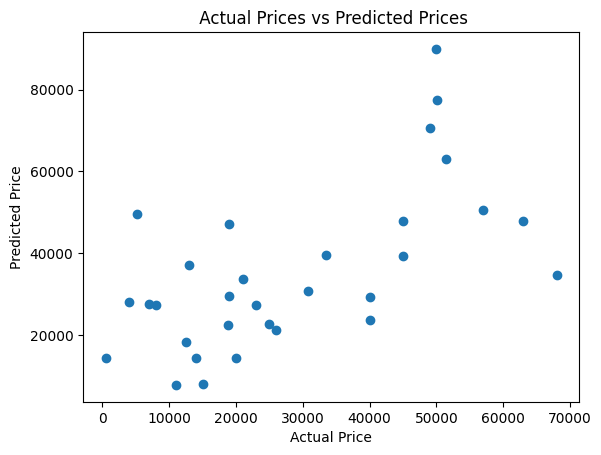

In [162]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

2. Lasso Regression

In [163]:
# loading the linear regression model
lass_reg_model = Lasso()

In [164]:
X_train.head()

,Year,Selling_Price,Present_Price,Fuel_Type,Seller_Type,Transmission,Owner
204,2015,2.75,4.430,0,0,0,0
249,2016,5.25,7.600,0,0,0,0
277,2015,9.70,13.600,0,0,0,0
194,2008,0.20,0.787,0,1,0,0
244,2013,5.95,9.400,1,0,0,0


In [165]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [166]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

training_data_prediction

array([ 24819.63821261,  16496.87979049,  19729.42663709,  65989.99751793,
        54270.44157468,  29965.71045316,   8533.09571261,  20570.54198995,
        62262.52899606,  70816.3548576 ,   7620.11263273,  20831.00996479,
        46902.79940584,  49700.83568985,   3376.18107006,  21073.62720688,
        53832.48309816,  15534.53464472,  31110.28633744,  40682.61419792,
        52923.10697174,  43765.72486524,  20373.86035556,   7489.49845866,
        46546.60548581,  27291.20942945, 106762.76445875,  46573.36383733,
        72286.27943934,  43704.32730593,   3704.64992745,  26777.6104203 ,
        10984.38516447,  40158.31361588, 126115.62270818,  30645.40303928,
        20215.90954912,  33821.54953672,  14002.0259551 ,  20987.19556492,
        31597.40399127,  39892.84270758,  20833.91009814,  89863.55634469,
        48082.37300154,  27886.63158943,   7078.46480377,  32746.36132324,
        45526.41055956,  20861.3091138 , 114939.80291927,  37168.564358  ,
        20968.8653107 ,  

In [167]:
# R squared Error
# error_score = metrics.r2_score(Y_train, training_data_prediction)
# print("R squared Error : ", error_score)

Visualize the actual prices and Predicted prices

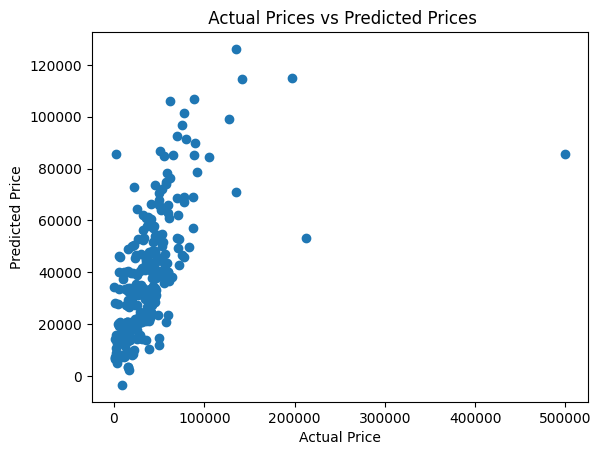

In [168]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [169]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

In [170]:
# R squared Error
# error_score = metrics.r2_score(Y_test, test_data_prediction)
# print("R squared Error : ", error_score)

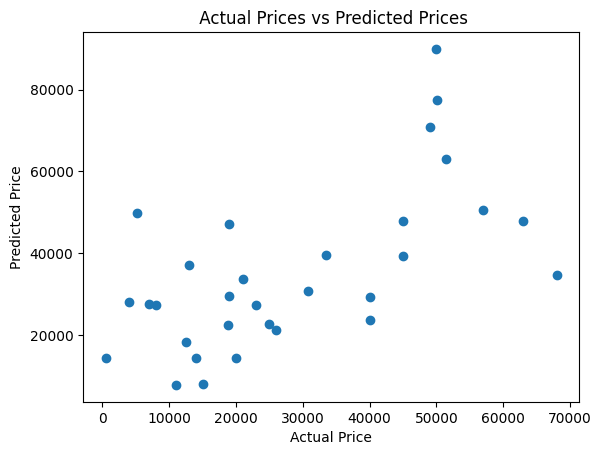

In [171]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [172]:
import pickle

pickle.dump(lass_reg_model,open('kms-model.pkl','wb'))

In [173]:
import pandas as pd
data={
    "Year": [2015],
    "Present_Price":[4.430],
    "Kms_Driven":[28282],
    "Fuel_Type":[0],
    "Seller_Type":[0],
    "Transmission":[0],
    "Owner":[0]
}
df=pd.DataFrame(data)

In [174]:
df

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2015,4.43,28282,0,0,0,0
